In [1]:
from pathlib import Path

import torch
from torch.utils.data import DataLoader
import pandas as pd

In [2]:
model = torch.load("./runs/lstm_1207_111556/model_epoch020.pt")
model

OrderedDict([('model.lstm.weight_ih_l0',
              tensor([[ 1.5736e-02,  1.5885e-01,  6.6859e-02,  ..., -5.8583e-02,
                        1.7550e-01, -1.0409e-01],
                      [ 1.3358e-01, -7.0442e-05, -4.1163e-02,  ..., -1.6722e-02,
                       -4.5420e-02, -9.9667e-02],
                      [-6.9846e-02,  3.2161e-02,  9.7769e-02,  ...,  2.3111e-01,
                        9.1283e-02, -7.7918e-02],
                      ...,
                      [ 1.6074e-01, -3.5549e-02,  7.0715e-03,  ...,  2.1209e-02,
                        1.1394e-01,  1.8951e-02],
                      [-1.0226e-01,  9.9359e-02, -6.5369e-02,  ..., -6.8628e-02,
                        5.3903e-02,  5.9260e-02],
                      [ 6.3068e-02,  1.5573e-01,  1.6678e-02,  ...,  6.1492e-02,
                        5.0996e-02,  1.5700e-01]], device='cuda:0')),
             ('model.lstm.weight_hh_l0',
              tensor([[ 0.1209,  0.1207, -0.0812,  ...,  0.0624, -0.1324, -0.0948],
 

In [3]:
from neuralhydrology.modelzoo.cudalstm import CudaLSTM
from neuralhydrology.utils.config import Config

In [4]:
run_dir = Path("./runs/lstm_1207_111556")
config = Config(run_dir / "config.yml")
config.as_dict()

{'batch_size': 512,
 'clip_gradient_norm': 1,
 'commit_hash': '8ab0ef3',
 'data_dir': PosixPath('../data/CAMELS_KZ'),
 'dataset': 'generic',
 'device': 'cuda:0',
 'dynamic_inputs': ['prcp',
  'srad',
  't_max',
  't_min',
  'pp_mean',
  'sat_max',
  'hum_mean',
  'dew_min',
  'discharge_prev',
  'level_prev'],
 'epochs': 20,
 'experiment_name': 'lstm',
 'head': 'regression',
 'hidden_size': 128,
 'img_log_dir': PosixPath('/home/spectre/Projects/ISSAI/Internship/aqua_rate/ML/runs/lstm_1207_111556/img_log'),
 'initial_forget_bias': 3,
 'learning_rate': {0: 0.01, 10: 0.001, 30: 0.0001, 40: 1e-05},
 'log_interval': 5,
 'log_tensorboard': True,
 'loss': 'NSE',
 'metrics': ['NSE', 'KGE'],
 'model': 'cudalstm',
 'num_workers': 8,
 'number_of_basins': 42,
 'optimizer': 'Adam',
 'output_activation': 'linear',
 'output_dropout': 0.4,
 'package_version': '1.10.0',
 'predict_last_n': 1,
 'run_dir': PosixPath('/home/spectre/Projects/ISSAI/Internship/aqua_rate/ML/runs/lstm_1207_111556'),
 'save_vali

In [5]:
model_lstm = CudaLSTM(cfg=config)
model_lstm

CudaLSTM(
  (embedding_net): InputLayer(
    (statics_embedding): Identity()
    (dynamics_embedding): Identity()
  )
  (model): CudaLSTMCore(
    (lstm): LSTM(32, 128)
    (dropout): Dropout(p=0.4, inplace=False)
    (head): Regression(
      (net): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
      )
    )
  )
)

In [6]:
model_lstm.load_state_dict(model)

<All keys matched successfully>

In [7]:
model_lstm

CudaLSTM(
  (embedding_net): InputLayer(
    (statics_embedding): Identity()
    (dynamics_embedding): Identity()
  )
  (model): CudaLSTMCore(
    (lstm): LSTM(32, 128)
    (dropout): Dropout(p=0.4, inplace=False)
    (head): Regression(
      (net): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
      )
    )
  )
)

In [8]:
from neuralhydrology.datasetzoo import GenericDataset, get_dataset
from neuralhydrology.datautils.utils import load_scaler

In [9]:
model = model_lstm.model
model

CudaLSTMCore(
  (lstm): LSTM(32, 128)
  (dropout): Dropout(p=0.4, inplace=False)
  (head): Regression(
    (net): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)

In [10]:
lstm = model.lstm
lstm

LSTM(32, 128)

In [11]:
ds = get_dataset(
    cfg=config,
    is_train=False,
    basin="11001",
    period="test",
    scaler=load_scaler(run_dir),
)

In [12]:
loader = DataLoader(ds, batch_size=4, num_workers=0, collate_fn=ds.collate_fn)

In [13]:
for data in loader:
    for key in data:
        if not key.startswith('date'):
            data[key] = data[key].to("cuda")

In [14]:
input_data = next(iter(loader))
input_data["x_d"].shape, input_data["x_s"].shape

(torch.Size([4, 365, 10]), torch.Size([4, 22]))

In [15]:
next(iter(loader))
test_data = next(iter(loader))

In [16]:
input_data

{'x_d': tensor([[[-0.3361, -1.0030, -1.6943,  ..., -1.9821,  0.3249,  0.0599],
          [-0.3361, -1.0140, -1.5761,  ..., -2.1448,  0.3290,  0.0599],
          [-0.3361, -0.9820, -1.6812,  ..., -2.0634,  0.3290,  0.0858],
          ...,
          [-0.3361, -1.0301, -1.2312,  ..., -1.4211,  0.1857, -0.0696],
          [-0.3361, -1.1649, -1.1984,  ..., -1.0914,  0.1902, -0.0567],
          [ 0.1848, -1.1343, -1.2542,  ..., -1.0572,  0.1942, -0.0567]],
 
         [[-0.3361, -1.0140, -1.5761,  ..., -2.1448,  0.3290,  0.0599],
          [-0.3361, -0.9820, -1.6812,  ..., -2.0634,  0.3290,  0.0858],
          [-0.3361, -0.9441, -1.8093,  ..., -2.0891,  0.3290,  0.0988],
          ...,
          [-0.3361, -1.1649, -1.1984,  ..., -1.0914,  0.1902, -0.0567],
          [ 0.1848, -1.1343, -1.2542,  ..., -1.0572,  0.1942, -0.0567],
          [-0.3361, -1.0487, -1.5334,  ..., -1.6481,  0.1829, -0.0826]],
 
         [[-0.3361, -0.9820, -1.6812,  ..., -2.0634,  0.3290,  0.0858],
          [-0.3361, -

In [17]:
test_data

{'x_d': tensor([[[-0.3361, -1.0030, -1.6943,  ..., -1.9821,  0.3249,  0.0599],
          [-0.3361, -1.0140, -1.5761,  ..., -2.1448,  0.3290,  0.0599],
          [-0.3361, -0.9820, -1.6812,  ..., -2.0634,  0.3290,  0.0858],
          ...,
          [-0.3361, -1.0301, -1.2312,  ..., -1.4211,  0.1857, -0.0696],
          [-0.3361, -1.1649, -1.1984,  ..., -1.0914,  0.1902, -0.0567],
          [ 0.1848, -1.1343, -1.2542,  ..., -1.0572,  0.1942, -0.0567]],
 
         [[-0.3361, -1.0140, -1.5761,  ..., -2.1448,  0.3290,  0.0599],
          [-0.3361, -0.9820, -1.6812,  ..., -2.0634,  0.3290,  0.0858],
          [-0.3361, -0.9441, -1.8093,  ..., -2.0891,  0.3290,  0.0988],
          ...,
          [-0.3361, -1.1649, -1.1984,  ..., -1.0914,  0.1902, -0.0567],
          [ 0.1848, -1.1343, -1.2542,  ..., -1.0572,  0.1942, -0.0567],
          [-0.3361, -1.0487, -1.5334,  ..., -1.6481,  0.1829, -0.0826]],
 
         [[-0.3361, -0.9820, -1.6812,  ..., -2.0634,  0.3290,  0.0858],
          [-0.3361, -

In [18]:
input_data["x_s"] = input_data["x_s"].unsqueeze(0).expand(365, 4, 22).swapaxes(0, 1)
input_data["x_d"].shape, input_data["x_s"].shape

(torch.Size([4, 365, 10]), torch.Size([4, 365, 22]))

In [19]:
input_data = torch.cat([input_data["x_d"], input_data["x_s"]], dim=2) 
input_data, input_data.shape

(tensor([[[-0.3361, -1.0030, -1.6943,  ...,  0.5518,  1.8709,  1.4554],
          [-0.3361, -1.0140, -1.5761,  ...,  0.5518,  1.8709,  1.4554],
          [-0.3361, -0.9820, -1.6812,  ...,  0.5518,  1.8709,  1.4554],
          ...,
          [-0.3361, -1.0301, -1.2312,  ...,  0.5518,  1.8709,  1.4554],
          [-0.3361, -1.1649, -1.1984,  ...,  0.5518,  1.8709,  1.4554],
          [ 0.1848, -1.1343, -1.2542,  ...,  0.5518,  1.8709,  1.4554]],
 
         [[-0.3361, -1.0140, -1.5761,  ...,  0.5518,  1.8709,  1.4554],
          [-0.3361, -0.9820, -1.6812,  ...,  0.5518,  1.8709,  1.4554],
          [-0.3361, -0.9441, -1.8093,  ...,  0.5518,  1.8709,  1.4554],
          ...,
          [-0.3361, -1.1649, -1.1984,  ...,  0.5518,  1.8709,  1.4554],
          [ 0.1848, -1.1343, -1.2542,  ...,  0.5518,  1.8709,  1.4554],
          [-0.3361, -1.0487, -1.5334,  ...,  0.5518,  1.8709,  1.4554]],
 
         [[-0.3361, -0.9820, -1.6812,  ...,  0.5518,  1.8709,  1.4554],
          [-0.3361, -0.9441,

In [20]:
input_data = model_lstm.pre_model_hook(input_data, is_train=False)

In [21]:
pred = model(input_data)
pred.shape

torch.Size([365, 4, 1])

In [22]:
import shap


# batch = next(iter(loader))
# images, _ = batch

background = input_data
# test_images = images[100:103]

explainer = shap.DeepExplainer(model, background)
# shap_values = e.shap_values(test_images)

In [25]:
shap_values = explainer(input_data)

TypeError: DeepExplainer.__call__() got an unexpected keyword argument 'dim'

In [19]:
# input_data.squeeze(0).shape


In [29]:
shap_values.shape

(4, 365, 32, 4)

In [35]:
np.set_printoptions(threshold=np.inf)
shap_values

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],

In [38]:
background.shape

torch.Size([4, 365, 32])

In [40]:
import numpy as np


# shap_numpy = list(np.transpose(shap_values, (4, 0, 2, 3, 1)))
test_numpy = np.swapaxes(np.swapaxes(shap_values, 1, -1), 1, 2)
test_numpy.shape

(4, 32, 4, 365)

In [37]:
test_numpy

array([[[-3.36050212e-01, -1.00304091e+00, -1.69432294e+00,
         -1.95636630e+00, -1.32359207e+00, -8.78848910e-01,
          8.82664740e-01, -1.98209023e+00,  3.24913770e-01,
          5.99337257e-02,  3.38259530e+00, -3.71111780e-01,
         -1.56377625e+00,  2.23986268e+00,  2.32042938e-01,
          1.25545061e+00, -3.10718417e-01, -3.44479322e-01,
          2.06066036e+00,  2.21399307e+00, -6.11496307e-02,
         -5.71890250e-02, -2.46522903e-01, -2.10167672e-02,
         -9.13219810e-01,  1.89937636e-01, -1.08938706e+00,
          1.02176048e-01,  4.85059977e-01,  5.51839292e-01,
          1.87086415e+00,  1.45544934e+00],
        [-3.36050212e-01, -1.01395786e+00, -1.57607949e+00,
         -2.03188848e+00, -1.32585442e+00, -8.38394582e-01,
          5.48573017e-01, -2.14480710e+00,  3.28971982e-01,
          5.99337257e-02,  3.38259530e+00, -3.71111780e-01,
         -1.56377625e+00,  2.23986268e+00,  2.32042938e-01,
          1.25545061e+00, -3.10718417e-01, -3.44479322e-

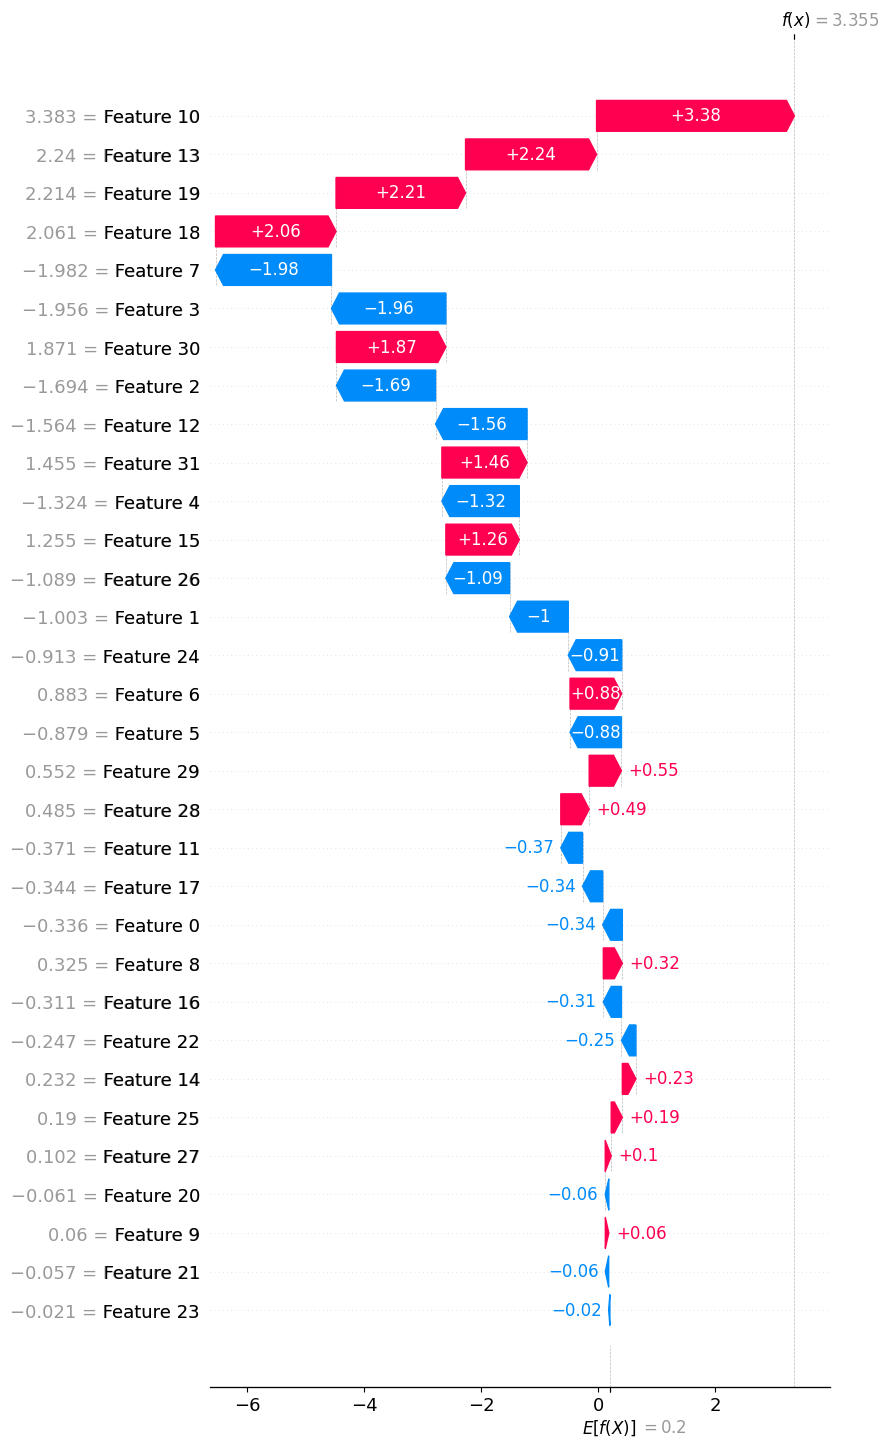

In [32]:
# Ensure the SHAP values are in the right shape for a single instance
shap_values_single_instance = test_numpy[0]

# Create the base value for the explanation (model's prediction on the given instance)
base_value = model(input_data).detach().numpy()[0]

# Create an Explanation object
explanation = shap.Explanation(values=shap_values_single_instance,
                               base_values=base_value,
                               data=input_data.numpy()[0])

# Plot the waterfall plot
shap.waterfall_plot(explanation[0], max_display=32)

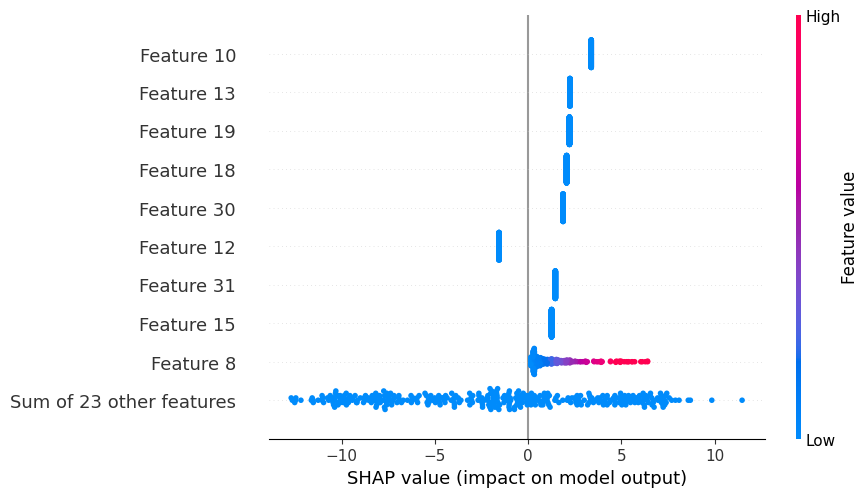

In [23]:
shap.plots.beeswarm(explanation)

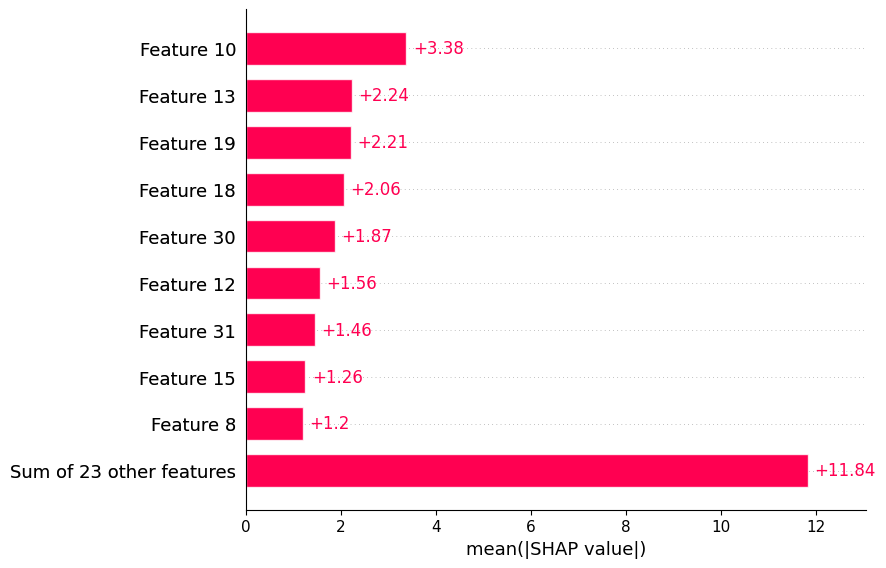

In [24]:
shap.plots.bar(explanation)